## Classification and Clustering of Phising URLs

In [26]:
#Importing the necessary Libraries


#Data processing and EDA libraries
import pandas as pd
import matplotlib.pyplot as plt

#Classification libraries and metrics
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

#Clustering libraries and metrics
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage,dendrogram,fcluster
from sklearn.metrics import silhouette_score

In [3]:
#Loading the dataset

df = pd.read_csv('C:/Users/USER/Desktop/data science AFRICDSA/Datasets/phiusiil+phishing+url+dataset/PhiUSIIL_Phishing_URL_Dataset.csv')
df.head()

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,521848.txt,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.0,1.000000,0.522907,...,0,0,1,34,20,28,119,0,124,1
1,31372.txt,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.0,0.666667,0.032650,...,0,0,1,50,9,8,39,0,217,1
2,597387.txt,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.0,0.866667,0.028555,...,0,0,1,10,2,7,42,2,5,1
3,554095.txt,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.0,1.000000,0.522907,...,1,1,1,3,27,15,22,1,31,1
4,151578.txt,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.0,1.000000,0.079963,...,1,0,1,244,15,34,72,1,85,1


#### Exploratory Data Analysis

In [4]:
#Getting the dimensions of the data

df.shape

(235795, 56)

The dataframe has 235795 rows and 56 columns

In [5]:
#Getting summary statistics 

df.describe()

,URLLength,DomainLength,IsDomainIP,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
count,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,...,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000
mean,34.573095,21.470396,0.002706,78.430778,0.845508,0.260423,0.055747,2.764456,1.164758,0.002057,...,0.237007,0.023474,0.486775,26.075689,6.333111,10.522305,65.071113,2.377629,49.262516,0.571895
std,41.314153,9.150793,0.051946,28.976055,0.216632,0.251628,0.010587,0.599739,0.600969,0.045306,...,0.425247,0.151403,0.499826,79.411815,74.866296,22.312192,176.687539,17.641097,161.027430,0.494805
min,13.000000,4.000000,0.000000,0.155574,0.000000,0.000000,0.001083,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,16.000000,0.000000,57.024793,0.680000,0.005977,0.050747,2.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,27.000000,20.000000,0.000000,100.000000,1.000000,0.079963,0.057970,3.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,8.000000,2.000000,6.000000,12.000000,0.000000,10.000000,1.000000
75%,34.000000,24.000000,0.000000,100.000000,1.000000,0.522907,0.062875,3.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,29.000000,8.000000,15.000000,88.000000,1.000000,57.000000,1.000000
max,6097.000000,110.000000,1.000000,100.000000,1.000000,0.522907,0.090824,13.000000,10.000000,1.000000,...,1.000000,1.000000,1.000000,8956.000000,35820.000000,6957.000000,27397.000000,4887.000000,27516.000000,1.000000


Some columns are seen to have a very big range in terms of their minimum and maximum values, which will need t be scaled later to avoid any biasness

In [6]:
#Getting the info of the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235795 entries, 0 to 235794
Data columns (total 56 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   FILENAME                    235795 non-null  object 
 1   URL                         235795 non-null  object 
 2   URLLength                   235795 non-null  int64  
 3   Domain                      235795 non-null  object 
 4   DomainLength                235795 non-null  int64  
 5   IsDomainIP                  235795 non-null  int64  
 6   TLD                         235795 non-null  object 
 7   URLSimilarityIndex          235795 non-null  float64
 8   CharContinuationRate        235795 non-null  float64
 9   TLDLegitimateProb           235795 non-null  float64
 10  URLCharProb                 235795 non-null  float64
 11  TLDLength                   235795 non-null  int64  
 12  NoOfSubDomain               235795 non-null  int64  
 13  HasObfuscation

No column is seen to have a null value. Also no column is miscategorized

In [7]:
#Categorizing columns into categorical and non-categorical

categorical = []
non_categorical = []

for i in df.columns:
    if df[i].dtype == 'object':
        categorical.append(i)
    else:
        non_categorical.append(i)
        
print("These are the categorical columns", categorical)
print("\nThese are the non-categorical columns", non_categorical)

These are the categorical columns ['FILENAME', 'URL', 'Domain', 'TLD', 'Title']

These are the non-categorical columns ['URLLength', 'DomainLength', 'IsDomainIP', 'URLSimilarityIndex', 'CharContinuationRate', 'TLDLegitimateProb', 'URLCharProb', 'TLDLength', 'NoOfSubDomain', 'HasObfuscation', 'NoOfObfuscatedChar', 'ObfuscationRatio', 'NoOfLettersInURL', 'LetterRatioInURL', 'NoOfDegitsInURL', 'DegitRatioInURL', 'NoOfEqualsInURL', 'NoOfQMarkInURL', 'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL', 'SpacialCharRatioInURL', 'IsHTTPS', 'LineOfCode', 'LargestLineLength', 'HasTitle', 'DomainTitleMatchScore', 'URLTitleMatchScore', 'HasFavicon', 'Robots', 'IsResponsive', 'NoOfURLRedirect', 'NoOfSelfRedirect', 'HasDescription', 'NoOfPopup', 'NoOfiFrame', 'HasExternalFormSubmit', 'HasSocialNet', 'HasSubmitButton', 'HasHiddenFields', 'HasPasswordField', 'Bank', 'Pay', 'Crypto', 'HasCopyrightInfo', 'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef', 'NoOfEmptyRef', 'NoOfExternalRef', 'label']


We have 5 non-categorical columns and 51 categorical columns

In [8]:
#Checking for null values

df.isna().sum()

FILENAME                      0
URL                           0
URLLength                     0
Domain                        0
DomainLength                  0
IsDomainIP                    0
TLD                           0
URLSimilarityIndex            0
CharContinuationRate          0
TLDLegitimateProb             0
URLCharProb                   0
TLDLength                     0
NoOfSubDomain                 0
HasObfuscation                0
NoOfObfuscatedChar            0
ObfuscationRatio              0
NoOfLettersInURL              0
LetterRatioInURL              0
NoOfDegitsInURL               0
DegitRatioInURL               0
NoOfEqualsInURL               0
NoOfQMarkInURL                0
NoOfAmpersandInURL            0
NoOfOtherSpecialCharsInURL    0
SpacialCharRatioInURL         0
IsHTTPS                       0
LineOfCode                    0
LargestLineLength             0
HasTitle                      0
Title                         0
DomainTitleMatchScore         0
URLTitle

There are no null values

In [9]:
#CHecking for duplicates

df.duplicated().sum()

0

The dataset has no duplicates

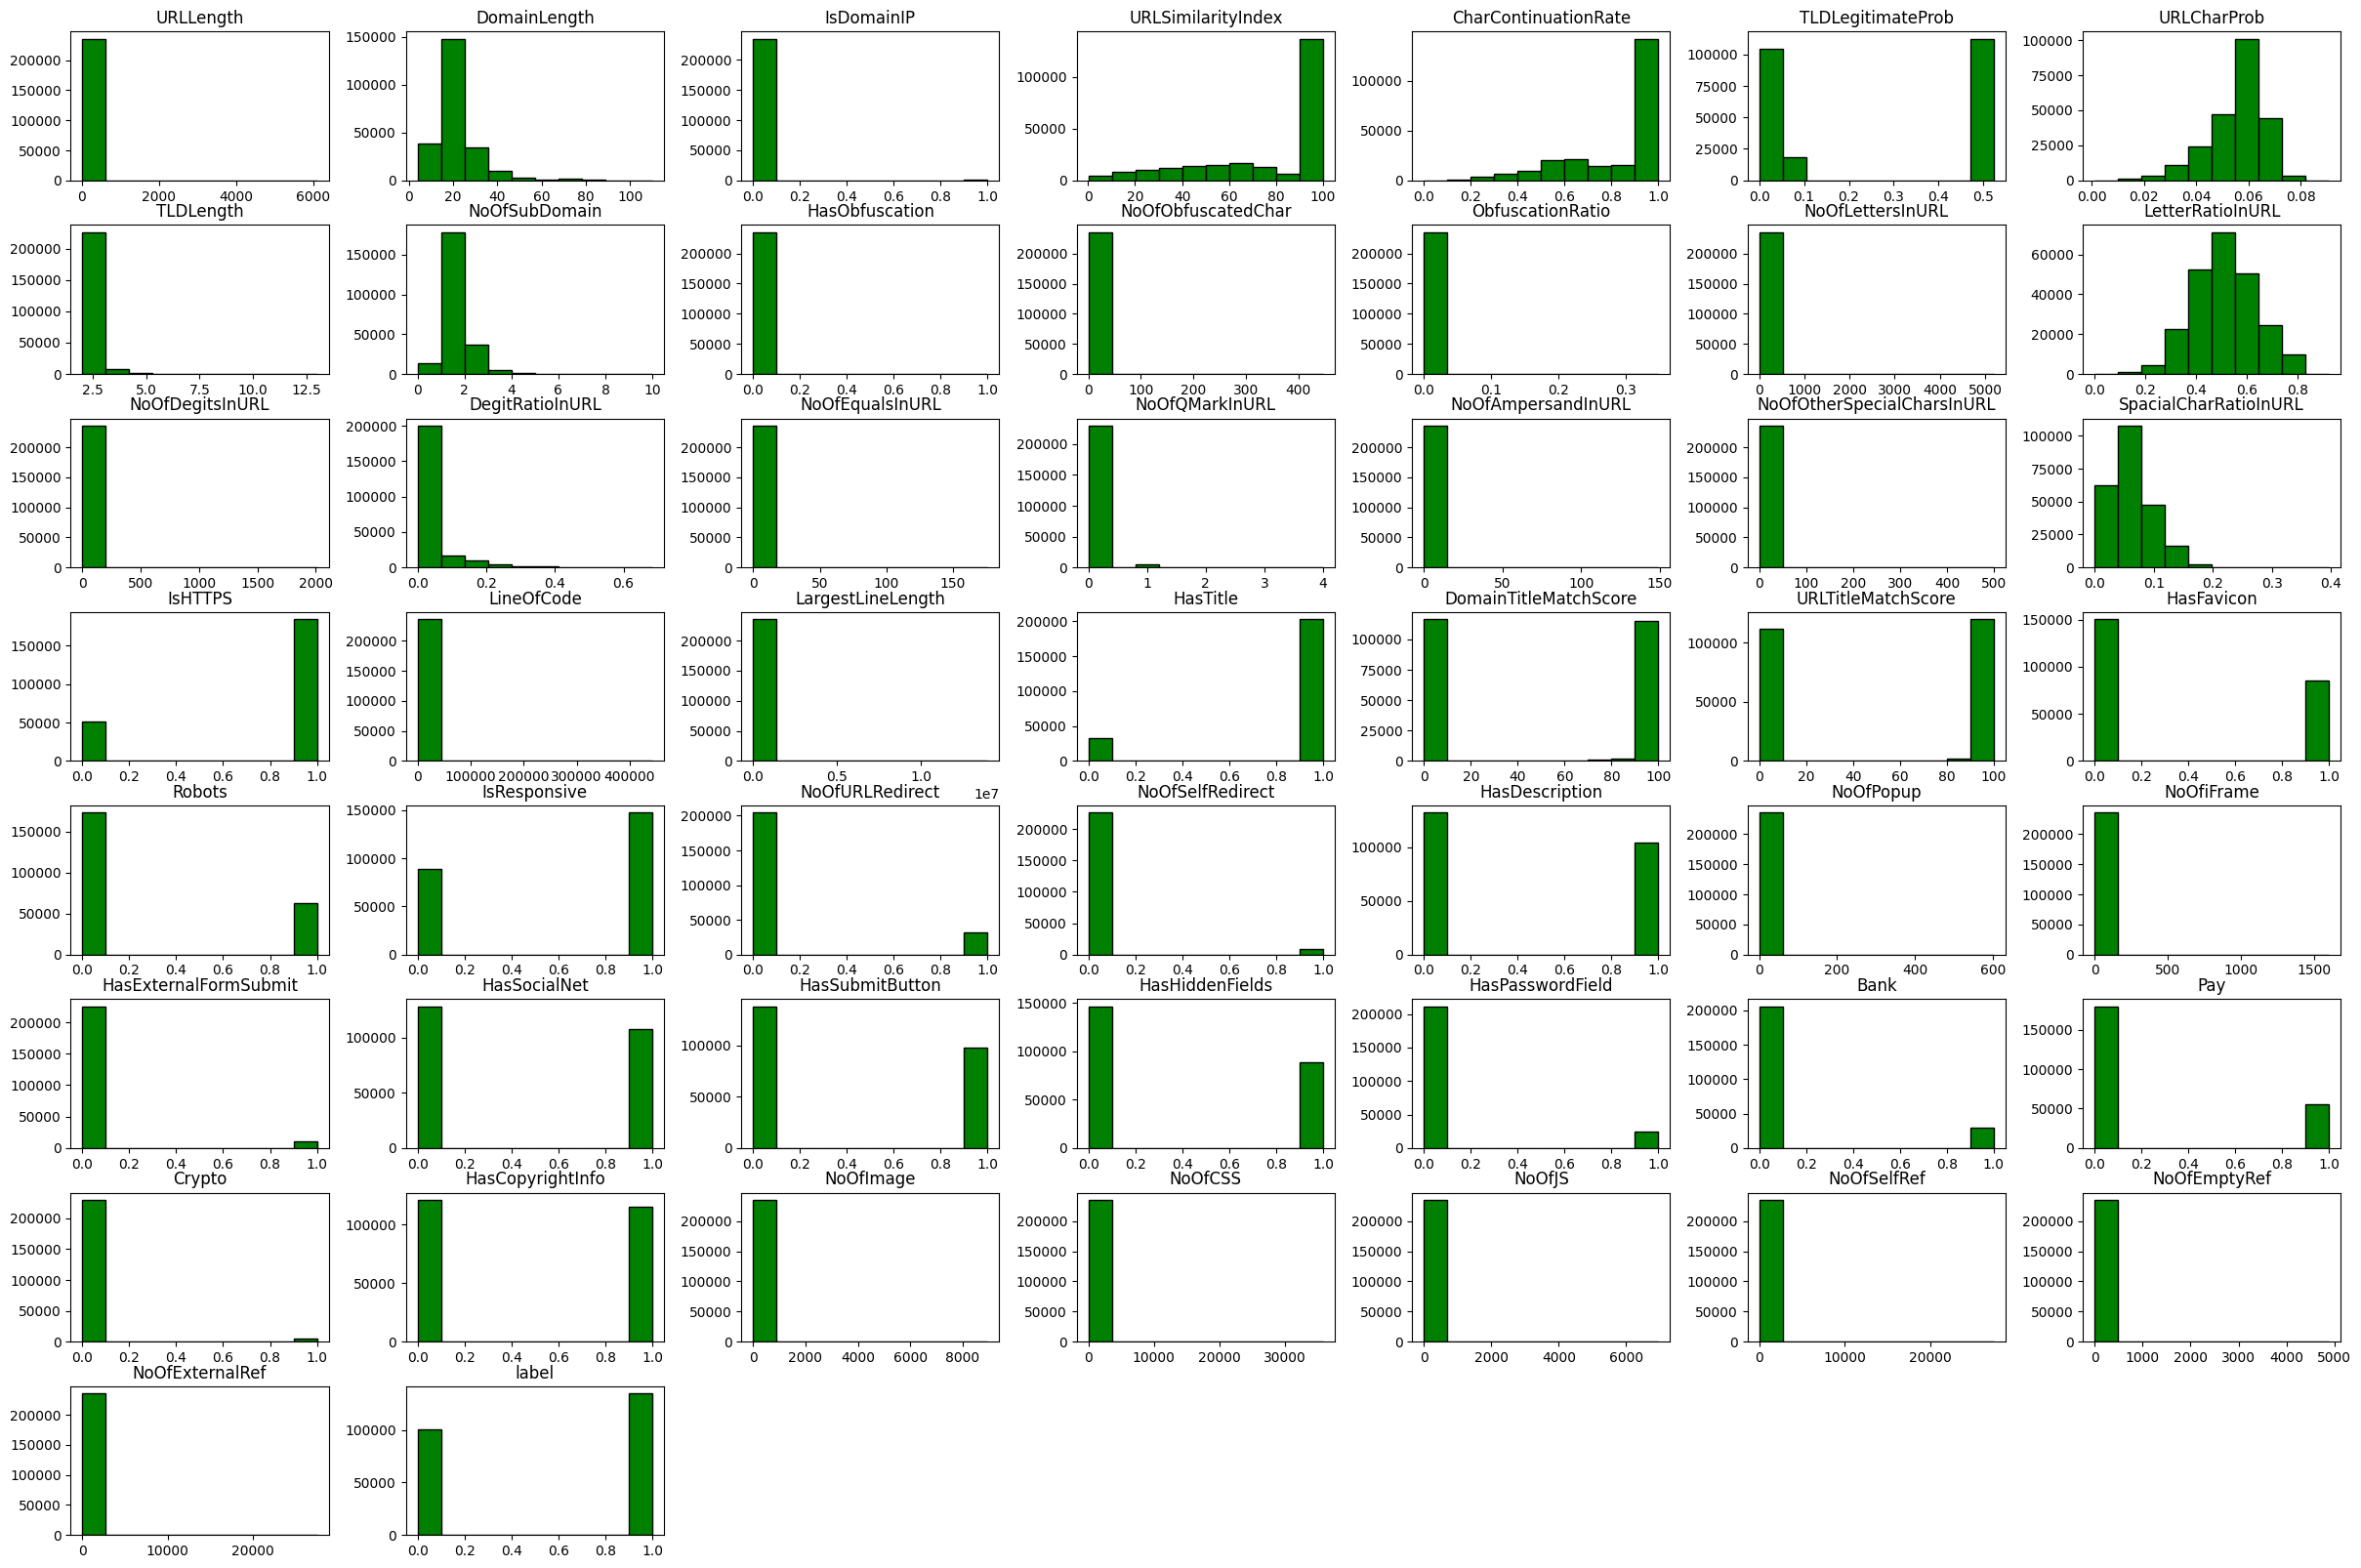

In [10]:
#Histograms
plt.rcParams['figure.figsize'] = (30,20)
df.hist(grid=False, color = 'green', edgecolor = 'black')
plt.show()

- Most of the columns are seen to have 2 unique classes.
- The domain length column is seen to be right skewed with most items being distributed at 20.
- The URL similarity index is seen to be left skewed with most items having a similarity index of 100. This is similar to the character. 
- No. of sub domain column is seen to be right skewed with most items having 2 subdomains.
- Letter ration URL is normally distributed with most items having 0.5 URLs.

In [ ]:
#Standardizing columns in preperation for ML model development

scaler = StandardScaler()

df[['URLLength','DomainLength','URLSimilarityIndex','NoOfLettersInURL','LineOfCode','LargestLineLength','DomainTitleMatchScore','URLTitleMatchScore','NoOfImage','NoOfCSS','NoOfJS','NoOfSelfRef','NoOfEmptyRef','NoOfExternalRef','NoOfiFrame','NoOfPopup']] = scaler.fit_transform(df[['URLLength','DomainLength','URLSimilarityIndex','NoOfLettersInURL','LineOfCode','LargestLineLength','DomainTitleMatchScore','URLTitleMatchScore','NoOfImage','NoOfCSS','NoOfJS','NoOfSelfRef','NoOfEmptyRef','NoOfExternalRef','NoOfiFrame','NoOfPopup']])
df.head()

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,521848.txt,https://www.southbankmosaics.com,-0.086486,www.southbankmosaics.com,0.276436,0,com,0.744382,1.000000,0.522907,...,0,0,1,0.099788,0.182551,0.783327,0.305222,-0.134778,0.464130,1
1,31372.txt,https://www.uni-mainz.de,-0.280125,www.uni-mainz.de,-0.597807,0,de,0.744382,0.666667,0.032650,...,0,0,1,0.301270,0.035622,-0.113046,-0.147555,-0.134778,1.041672,1
2,597387.txt,https://www.voicefmradio.co.uk,-0.134896,www.voicefmradio.co.uk,0.057875,0,uk,0.744382,0.866667,0.028555,...,0,0,1,-0.202435,-0.057878,-0.157865,-0.130576,-0.021406,-0.274876,1
3,554095.txt,https://www.sfnmjournal.com,-0.207510,www.sfnmjournal.com,-0.269966,0,com,0.744382,1.000000,0.522907,...,1,1,1,-0.290583,0.276051,0.200684,-0.243770,-0.078092,-0.113413,1
4,151578.txt,https://www.rewildingargentina.org,-0.038077,www.rewildingargentina.org,0.494997,0,org,0.744382,1.000000,0.079963,...,1,0,1,2.744236,0.115765,1.052238,0.039216,-0.078092,0.221935,1


In [13]:
#Dimensionality reduction

#Choosing our X columns and using the first 10,000 rows to proceed with the model

X = df.drop(['label', 'FILENAME', 'URL', 'Domain', 'TLD', 'Title'], axis = 1)[:10000]
X.head()

#Using PCA to reduce the dimensions of the column

pca = PCA(n_components=5)

X = X.copy()

X = pca.fit_transform(X)
X

array([[-1.49632597,  0.36871739, -0.30278189, -0.15451846,  1.01534088],
       [-1.49315115,  0.14343597, -0.08210128,  0.58730137,  0.24190078],
       [-1.41362855, -0.20681485, -0.22070708,  0.10720035, -0.10958603],
       ...,
       [-1.59474763,  1.04445994, -0.8220385 , -0.01614045, -0.6862284 ],
       [-1.49103476,  1.40778965,  0.08636093,  0.53749007, -0.02374463],
       [-1.58607352,  1.09476542, -0.81621814,  0.19745102, -0.79244008]])

### KMeans Clustering

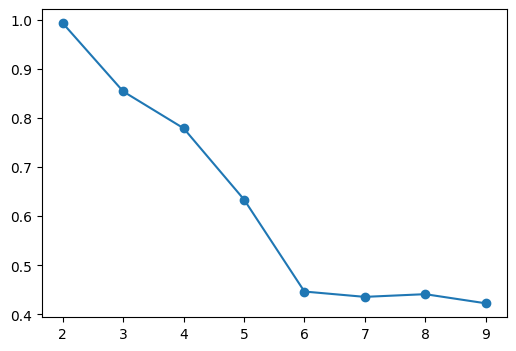

In [14]:
#Getting the ideal number of clusters and perforning KMeans clustering

clusters = range(2,10)
accuracy = []

for i in clusters:
    kmeans = KMeans(n_clusters=i, random_state=42)

    kmeans.fit(X)
    
    labels = kmeans.labels_
    
    sil_score = silhouette_score(X,labels)
    accuracy.append(sil_score)
    
#line plot

plt.figure(figsize=(6,4))
plt.plot(clusters, accuracy, marker = 'o')
plt.show()

The ideal number of clusters is 2 as it gives us the highest silhouette score.

In [15]:
# Developing the KMeans model using 2 clusters

kmeans = KMeans(n_clusters=2, random_state=42)

kmeans.fit(X)
    
labels = kmeans.labels_
    
sil_score = silhouette_score(X,labels)
print(round(sil_score,2))

0.99


The silhouette score of the KMeans model is 0.99

In [16]:
#Using the last 10000 rows to see whether the silhouette score of the model is as high as it is with the first 10,000 rows

X_last = df.drop(['label', 'FILENAME', 'URL', 'Domain', 'TLD', 'Title'], axis = 1)[225795:]
X_last.head()

#Using PCA to reduce the dimensions of the column

pca = PCA(n_components=5)

X_last = X_last.copy()

X = pca.fit_transform(X_last)

kmeans = KMeans(n_clusters=2, random_state=42)

kmeans.fit(X_last)
    
labels = kmeans.labels_
    
sil_score = silhouette_score(X_last,labels)
print(round(sil_score,2))

0.92


The silhouette score is seen to be 0.92, a bit lower than the previous score but still of high accuracy.

### KMeans Clustering Conclusion

- We can note that clustering the dataset into 2 categoreis gives us a high silhouette score of 0.99. This was possible when I applied the first 10000 rows of the dataset as it was consuming much time using the whole dataset. When using the last 10000 rows, the model had an accuracy of 0.92, lower than the previous score but still high. 

### Hierarchical clustering 

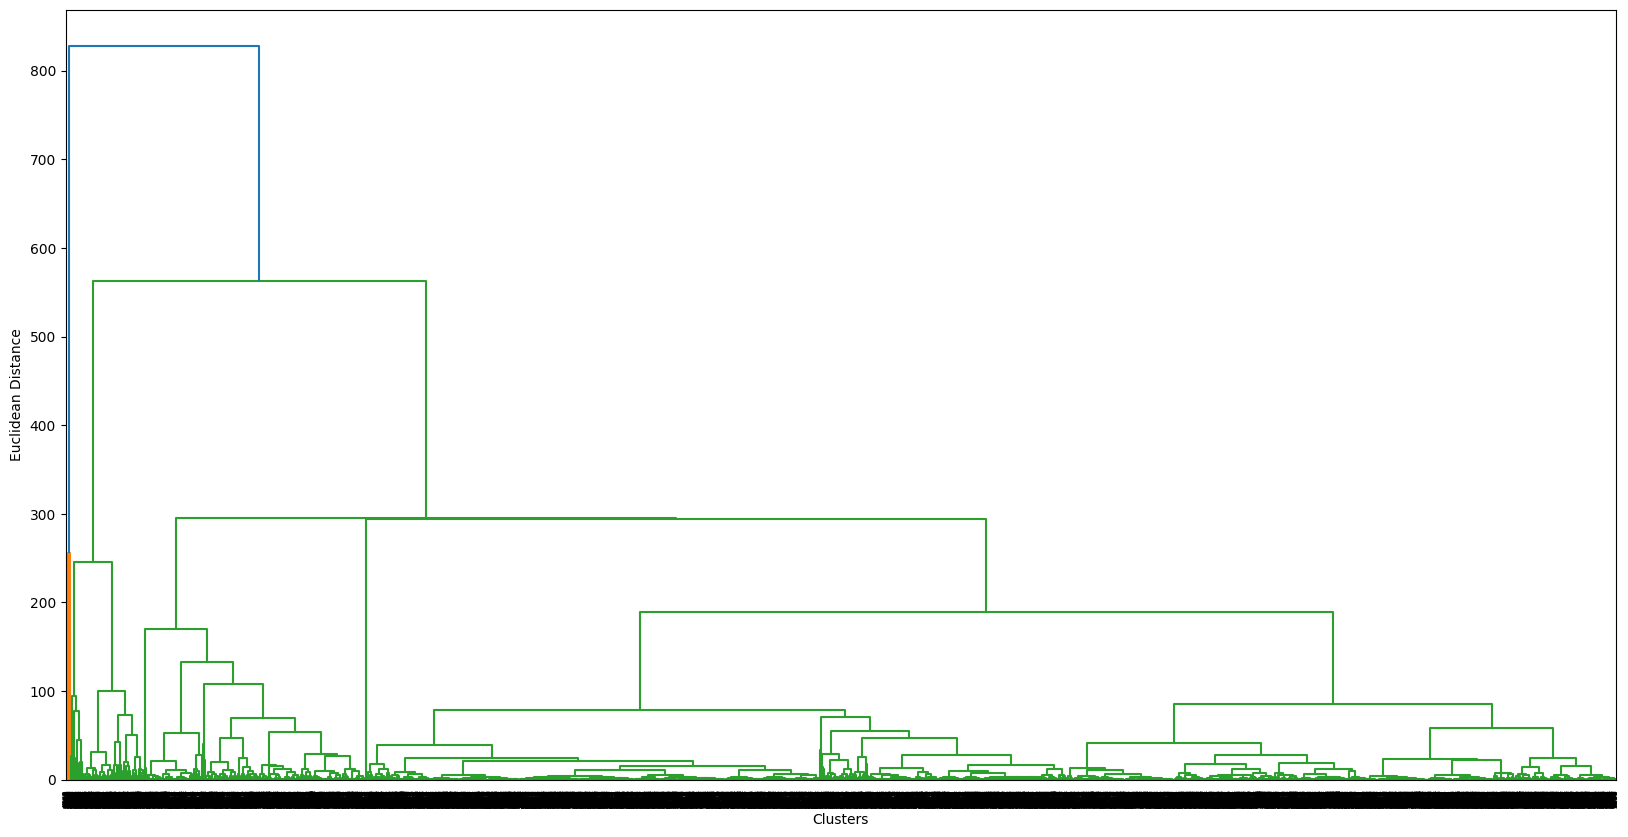

In [17]:
#Creating a linkage matrix

linkage_matrix = linkage(X, 'ward')

#Creating a dendogram to visualize the matrix

plt.figure(figsize= (20,10))
dendrogram(linkage_matrix)
plt.xlabel('Clusters')
plt.ylabel('Euclidean Distance')
plt.show()

In [18]:
#Creating the clusters and checking the accuracy

clusters = fcluster(linkage_matrix,2,criterion='maxclust')
sil_score_h = silhouette_score(X, clusters)
print(round(sil_score_h, 2))

0.94


### Hierarchical Clustering Conclusion

The silhouette score of the hierarchical clustering model is 0.94, which is also a high accuracy, similar to the KMeans clustering score, both of which used the first 10,000 rows.

## KNN Classification

In [19]:
# Feature Engineering using all of the dataset

x = df.drop(['label', 'FILENAME', 'URL', 'Domain', 'TLD', 'Title'], axis = 1)
y = df['label']

#Splitting the data to train and test

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

#Initializing the model

knn = KNeighborsClassifier(n_neighbors=5)

#Fitting the model

knn.fit(X_train, y_train)

#Making predictions

y_predict = knn.predict(X_test)

#Checking the accuracy score and getting the confusion matrix and classification report

knn_acc = accuracy_score(y_predict, y_test)
print('The accuracy score of the KNN model is:', round(knn_acc,2))

knn_matrix = confusion_matrix(y_predict, y_test)
print('\n KNN  Model confusion matrix:\n', knn_matrix)

knn_report = classification_report(y_predict, y_test)
print('\n KNN Model classification report:\n', knn_report)

The accuracy score of the KNN model is: 1.0

 KNN  Model confusion matrix:
 [[20103    10]
 [   21 27025]]

 KNN Model classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     20113
           1       1.00      1.00      1.00     27046

    accuracy                           1.00     47159
   macro avg       1.00      1.00      1.00     47159
weighted avg       1.00      1.00      1.00     47159



- The accuracy of the KNN model in predicting the likelihood of a phising URL is 1.0. This shows that it is a very accurate model. 
- Additionally, the precision, recall, and f1-scores are all seen to be perfect.
- Therefore, this KNN model can be used to help predict phishing and non-phishing URLs accurately if deployed. 

## Random Forest Classifier

In [20]:
#Initializing the model

rfc = RandomForestClassifier()

#Fitting the model

rfc.fit(X_train, y_train)

#Making predictions

y_predict = rfc.predict(X_test)

#Checking the accuracy score, getting the classification report and the confusion matrix

rfc_acc = accuracy_score(y_predict, y_test)
print('The accuracy score of the Random Forest model is:', round(rfc_acc,2))

rfc_matrix = confusion_matrix(y_predict, y_test)
print('\n Random Forest Model confusion matrix:\n', rfc_matrix)

rfc_report = classification_report(y_predict, y_test)
print('\n Random Forest Model classification report:\n', rfc_report)

The accuracy score of the Random Forest model is: 1.0

 Random Forest Model confusion matrix:
 [[20124     0]
 [    0 27035]]

 Random Forest Model classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     20124
           1       1.00      1.00      1.00     27035

    accuracy                           1.00     47159
   macro avg       1.00      1.00      1.00     47159
weighted avg       1.00      1.00      1.00     47159



- Similar to the KNN Model, the Random Forest Classifier Model is seen to perform perfectly, although there are no false negatives in the confusion matrix, a sign of possible overfitting.

## Logistic Regression Classifier

In [21]:
#Initializing the model

logr = LogisticRegression()

#Fitting the model

logr.fit(X_train, y_train)

#Making predictions

y_predict = logr.predict(X_test)

#Checking the accuracy score, getting the classification report and the confusion matrix

logr_acc = accuracy_score(y_predict, y_test)
print('The accuracy score of the Logistic regression model is:', round(logr_acc,2))

logr_matrix = confusion_matrix(y_predict, y_test)
print('\n Logistic Regression Model confusion matrix:\n', logr_matrix)

logr_report = classification_report(y_predict, y_test)
print('\n Logistic Regression Model classification report:\n', logr_report)

The accuracy score of the Logistic regression model is: 1.0

 Logistic Regression Model confusion matrix:
 [[20118     0]
 [    6 27035]]

 Logistic Regression Model classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     20118
           1       1.00      1.00      1.00     27041

    accuracy                           1.00     47159
   macro avg       1.00      1.00      1.00     47159
weighted avg       1.00      1.00      1.00     47159



- Similarly, the Logistic regression model is seen to perform optimally and better than the KNN model. There are seen to be false negatives in the second class, where 6 items were misclassified. 

## Support Vector Machine

In [22]:
svm = SVC(random_state=42)

#Fitting the model

svm.fit(X_train, y_train)

#Making predictions

y_predict = svm.predict(X_test)

#Checking the accuracy score, getting the classification report and the confusion matrix

svm_acc = accuracy_score(y_predict, y_test)
print('The accuracy score of the Support vector machine model is:', round(svm_acc,2))

svm_matrix = confusion_matrix(y_predict, y_test)
print('\n Support Vector Machine Model confusion matrix:\n', svm_matrix)

svm_report = classification_report(y_predict, y_test)
print('\n Support Vector Machine Model classification report:\n', svm_report)

The accuracy score of the Support vector machine model is: 1.0

 Support Vector Machine Model confusion matrix:
 [[20116     1]
 [    8 27034]]

 Support Vector Machine Model classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     20117
           1       1.00      1.00      1.00     27042

    accuracy                           1.00     47159
   macro avg       1.00      1.00      1.00     47159
weighted avg       1.00      1.00      1.00     47159



The Support vector machine classifier is also seen to perform optimally with 100% accuracy.

## Gradient Boosting Classifier

In [27]:
gbc = GradientBoostingClassifier()

#Fitting the model

gbc.fit(X_train, y_train)

#Making predictions

y_predict = gbc.predict(X_test)

#Checking the accuracy score, getting the classification report and the confusion matrix

gbc_acc = accuracy_score(y_predict, y_test)
print('The accuracy score of the Gradient Boosting Classifier model is:', round(svm_acc,2))

gbc_matrix = confusion_matrix(y_predict, y_test)
print('\n Gradient Boosting Classifier Model confusion matrix:\n', gbc_matrix)

gbc_report = classification_report(y_predict, y_test)
print('\n Gradient Boosting Classifier Model classification report:\n', gbc_report)

cvs = cross_val_score(gbc,X_train,y_train, cv=5, n_jobs=-1).mean()
print('\n The cross validation score of the Gradient Boosting Classifier is:', cvs)

The accuracy score of the Gradient Boosting Classifier model is: 1.0

 Gradient Boosting Classifier Model confusion matrix:
 [[20124     0]
 [    0 27035]]

 Gradient Boosting Classifier Model classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     20124
           1       1.00      1.00      1.00     27035

    accuracy                           1.00     47159
   macro avg       1.00      1.00      1.00     47159
weighted avg       1.00      1.00      1.00     47159


 The cross validation score of the Gradient Boosting Classifier is: 1.0


The Gradient Boosting Classifier Model is also seen to perform optimally with 100% accuracy. A cross validation score of 1.0 shows that the model performs well on unseen data, which helps in reducing the risk of overfitting and underfitting.

## Conclusion

- The clustering models applied in classifying whether a URL is used for phishing or not performed quire well, with accuracies of more than 0.94 depending on the data that was used.
- Similarly, the classification models that were used to develop prediction models to check whether a link is for phishing or not gave us excellent accuracies, with all of them having 100% scores. 
- This shows that with the dataset used (Courtesy of UCI ML Repository) has assisten in developing models that are useful in predicting the genuinness of a URL that we normally click while browsing online. 